# 1) Given the following function

$$ f(x,t) = e^{-\omega t^{2}} cos(\frac{n \pi x}{L}) $$ 

### Find the followint partial derivatives

 a) $\frac{\partial f}{\partial x} $




b) $\frac{\partial f}{\partial t} $

## 2. Give an example of a linear vector space (with a basis)

## 3. Find the inverse for the matrix

$$
\begin{pmatrix}
a & b\\
c & d
\end{pmatrix}
$$

The first approach is using a `numpy` function that invert a matrix:

In [340]:
a, b, c, d = 1, 2, 3, 4
matrix = np.array([[a,b],[c,d]]) 
np.linalg.inv(matrix) 

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

The second is using the math. Suppose we have a matrix A, so the identity matrix is equal the A times the inverse of A:

$$
A^{-1} A = A A^{-1}= I
$$

We can find the inverse of a $2 x 2$ matrix by equations:

$$
A^{-1} = \begin{pmatrix} \frac{d}{\delta} & \frac{-b}{\delta} \\ \frac{-c}{\delta} & \frac{a}{\delta} \end{pmatrix}
$$

where $\delta$ is the determinand of A:

$$
\delta = ad - bc
$$

In words:

1. invert the entries on the major diagonal
2. invert the signal of the entries on the minor diagonal
3. divide all by the determinant



## 4. Give a definition and an example of a supervised learning algorithm


A supervised learning is when every record, each observation of dataset, contains a response label, e.g., considering a dataset containg records $(X, Y)$, $X = {X_1, ..., X_n}$ are observed, called features or attributes, and the labels are values of a class variable $Y$. We can have regression and classification problems, but here I will focus in regression models. 

An example of algorithm is a linear regression, one of the most simple approach for this kind of learning. This algorithm assume that there is a linear relationship between $X$ and $Y$, so we can predict $Y$ on the basis of $X$ feature. Mathematically:

$$Y = \beta_0 + \beta_1X$$

Where $b_0$ and $b_1$ are, respectively, the interecept and the slope in the linear model, constant terms that we need to estimate minimizing the residual sum of squares (RSS) of a linear model. 

First, I estimate $b_0$ and $b_1$, with the minimizers equations:

$$ 
\hat{\beta_1} = \frac{\sum_{i=1}^n (x_1 - \overline{x})(y_1 - \overline{y})}{\sum_{i=1}^n (x_1 - \overline{x})^2},
$$

$$ 
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{x}
$$

In [242]:
import numpy as np
from sklearn import datasets
data_dict = datasets.load_boston()
raw = pd.DataFrame(data_dict['data'], columns = data_dict['feature_names'])

# using only one variable, full-value property-tax rate per $10,000
x = raw[['RM']]  
y_df = pd.DataFrame(data_dict['target'], columns = ['y'])
dataset = pd.concat([x, y_df], axis = 1)
dataset.columns = [['x', 'y']]

# 1. calculate \hat(\beta_1)
def calculate_beta_coefs(df):
    # x and y mean
    x_mean = np.mean(df[['x']].values) 
    y_mean = np.mean(df[['y']].values)

    numerator = []
    denominator = []
    for i, row in df.iterrows():
        numerator.append((row['x'] - x_mean) * (row['y'] - y_mean))
        denominator.append((row['x'] - x_mean)**2) 
    b_1 = np.sum(numerator) / np.sum(denominator)
    b_0 = y_mean - b_1 * x_mean
    return {'beta_1': b_1, 'beta_0': b_0}

calculate_beta_coefs(dataset)

{'beta_1': 9.10210898118031, 'beta_0': -34.67062077643857}

Means that our function is:

$$
Y = -34.67 + 9.1 X 
$$

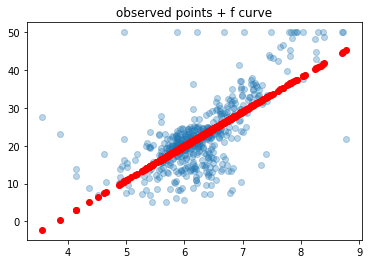

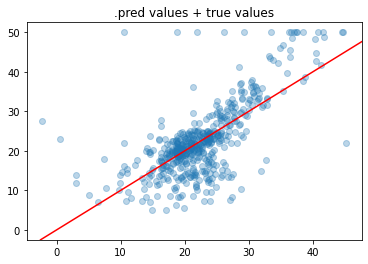

In [266]:
# 3. Predict each value on X with the function
x = dataset[['x']].values.reshape(1, -1)
y = dataset[['y']].values.reshape(1, -1)

def linear_regression(x):
    return -34.67 + 9.1 * x

y_pred = [] 
for value in x:
    y_pred.append(linear_regression(value))

### observed points + f curve
plt.scatter(x, y, alpha=0.3)
plt.scatter(x, y_pred, color = 'red')
plt.title('observed points + f curve')
plt.show()

# comparing the actual values with the predict values, help us understand if our algorithm is good. The red line is a reference line.
plt.scatter(y_pred, y, alpha=0.3)
plt.axline((0, 0), slope=1, color = 'red')
plt.title('.pred values + true values')
plt.show()

###  We can train the model with a library called sklearn

{'beta_1': array([[9.10210898]]), 'beta_0': array([-34.67062078])}


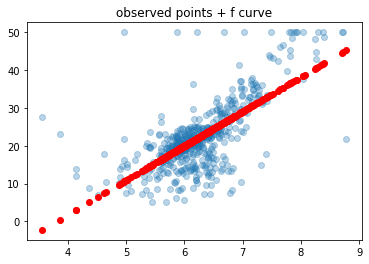

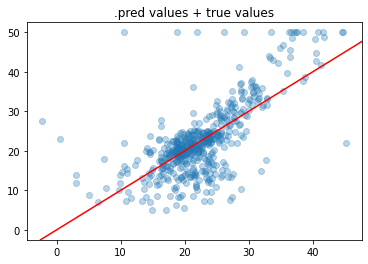

In [284]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 0. separate the dataset in train and test split
## here, I will not separate them for explanable reasons
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## 1. train the model
lr_model = LinearRegression()
lr_model.fit(dataset['x'], dataset['y'])

print({'beta_1':lr_model.coef_, 'beta_0':  lr_model.intercept_})

## 3. predict 
y_pred_skl = lr_model.predict(dataset['x'])

## 4. see this in a plot
### observed points + f curve
plt.scatter(dataset['x'], dataset['y'], alpha=0.3)
plt.scatter(dataset['x'], y_pred_skl, color = 'red')
plt.title('observed points + f curve')
plt.show()

# comparing the actual values with the predict values, help us understand if our algorithm is good. The red line is a reference line.
plt.scatter(y_pred_skl, y, alpha=0.3)
plt.axline((0, 0), slope=1, color = 'red')
plt.title('.pred values + true values')
plt.show()

That help us see curve of the function $f$, that predict the variable $Y$ with variable $x$

## 5. Give a definition and an example of an unsupervised learning algorithm.

## 6. Name 3 types of metrics, and their formulas, used in K-Means clustering algorithm

## 7. Name and describe any algorithm to inverte a Matrix

In [ ]:
# gauss -jordan

## 8. Explain what is a logistic regression and give an example of application (describe it as best as you can).

Logistic regression is a supervised learning algorithm for classification, e.g., the target variable, $Y$, is a class. Supposing a target with the target value $0$ or $1$, a logistic regression will models the probability that an $Y$ belongs to a class, so we have:

$$
p(X) = Pr(Y = 1|X)
$$

But, we have a problem, because the prediction must fall between 0 and 1, so e need a function that gives output with this condition, for example, the logistic function:

$$
p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_1 + \beta_1X}}
$$

With a bit of manipulation, we have:

$$
log \frac{p(X)}{1 - p(X)} = \beta_0 + \beta_1X
$$

In other words, a logistic regression fit a 'S' curve in the points.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.special import expit

iris_dict = datasets.load_iris()
x_iris = iris_dict['data'][:,0][0:100].reshape(-1, 1)
y_iris = iris_dict['target'][0:100]

x_test = np.linspace(4.0,7.0,100)

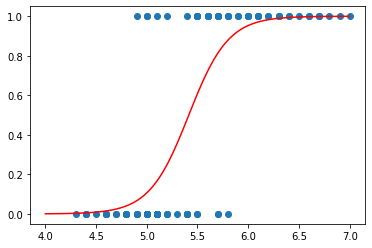

In [92]:
import numpy as np
# load the model
lr_model = LogisticRegression(C=1e5, solver='lbfgs')

# training the model 
lr_model.fit(x_iris, y_iris)

# plot
plt.scatter(x_iris, y_iris)

# # plotting the curve
loss = expit(x_test * lr_model.coef_ + lr_model.intercept_).ravel()
plt.plot(x_test, loss, color = 'red')

## 9. Describe in steps how would you perform preliminary analysis on a dataset


1. merging tables, if necessary
2. understand the variables and the "reason" behind the dataset, if is a business dataset, understand the business
3. understand the variables statistically, with plots, summary, distributions and correlation analysis
4. if necessary, discretize and normalize the data
5. transform categories variables into numerical
6. remove outliers
7. handling missing data 
8. feature engineering and feature selection, build aggregations and choose the rigth features

## 10. Given the two tables A and B, give the result for the query below

<h3>Table A</h3>
<table>
<thead>
<tr>
<th>ID</th>
<th>Name</th>
<th>Born_in</th>
</tr>
</thead>
<tbody>
<tr>
<td>9991</td>
<td>John</td>
<td>Liverpool</td>
</tr>
<tr>
<td>9992</td>
<td>Paul</td>
<td>Liverpool</td>
</tr>
<tr>
<td>9993</td>
<td>Ringo</td>
<td>Liverpool</td>
</tr>
<tr>
<td>9994</td>
<td>George</td>
<td>Liverpool</td>
</tr>
</tbody>
</table>

<h3>Table B</h3>
<table>
<thead>
<tr>
<th>ID</th>
<th>Instrument</th>
<th>Football_Club</th>
</tr>
</thead>
<tbody>
<tr>
<td>9991</td>
<td>Vocal</td>
<td>Liverpool</td>
</tr>
<tr>
<td>9992</td>
<td>Base</td>
<td>Liverpool</td>
</tr>
<tr>
<td>9993</td>
<td>Drums</td>
<td>Liverpool</td>
</tr>
<tr>
<td>9995</td>
<td>Guitar</td>
<td>Arsenal</td>
</tr>
<tr>
<td>9992</td>
<td>Piano</td>
<td>Liverpool</td>
</tr>
</tbody>
</table>

```
SELECT A.ID, A.Name, A.Born_in, B.Instrument, B.Football_Club
FROM A
LEFT JOIN B
ON A.ID = B.ID;
```

In [327]:
import sqlite3

t1 = pd.DataFrame({
        'ID': ['9991', '9992', '9993', '9994'],
        'Name': ['John', 'Paul', 'Ringo', 'George'],
        'Born_in': ['Liverpool', 'Liverpool', 'Liverpool', 'Liverpool']
        })

t2 = pd.DataFrame({
        'ID': ['9991', '9992', '9993', '9995', '9992'],
        'Instrument': ['Vocal', 'Base', 'Drums', 'Guitar', 'Piano'],
        'Football_Club': ['Liverpool', 'Liverpool', 'Liverpool', 'Arsenal', 'Liverpool']
        })

# connecting with a database
conn = sqlite3.connect('database.db')
c = conn.cursor()

# create two data sets, table A and table B, declaring the names and types of the columns
c.execute('CREATE TABLE IF NOT EXISTS names (id_table INTEGER PRIMARY KEY , id integer, name text, born_in text)')
c.execute('CREATE TABLE IF NOT EXISTS products (id_table INTEGER PRIMARY KEY, id integer, instrument text, football_club text)')

# inserting values into each datasets
for i, row in t1.iterrows():
    c.execute(f"INSERT INTO names (id, name, born_in) VALUES ('{row['ID']}', '{row['Name']}', '{row['Born_in']}')")

for i, row in t2.iterrows():
    c.execute(f"INSERT INTO products (id, instrument, football_club) VALUES ('{row['ID']}', '{row['Instrument']}', '{row['Football_Club']}')")
    
conn.commit()
conn.close()

In [335]:
# open other connection to select data 
connection = sqlite3.connect('database.db')
cursor = connection.cursor()

# executing the necessary query
cursor.execute(''' 
  SELECT A.ID, A.Name, A.Born_in, B.Instrument, B.Football_Club
  FROM names A
  LEFT JOIN products B
  ON A.ID = B.ID''')

# bring the result to python structure
output = cursor.fetchall()
connection.commit()
connection.close()

# transform into a dataframe
df = pd.DataFrame(output, columns = ['ID', 'Name', 'Born_in', 'Instrument', 'Football_Club'])
df

,ID,Name,Born_in,Instrument,Football_Club
0,9991,John,Liverpool,Vocal,Liverpool
1,9992,Paul,Liverpool,Base,Liverpool
2,9992,Paul,Liverpool,Piano,Liverpool
3,9993,Ringo,Liverpool,Drums,Liverpool
4,9994,George,Liverpool,None,None
